In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
file_path = r"C:\Users\Hanna\Downloads\Kingdom Housing presentation\Sample data.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [7]:
# Renaming columns for consistency
df.rename(columns={'Monthly_Rent (Â£)': 'Monthly_Rent (£)'}, inplace=True)

# Convert Request_Date to datetime
df['Request_Date'] = pd.to_datetime(df['Request_Date'], errors='coerce')

# Convert Resolution_Time_Days to numeric
df['Resolution_Time_Days'] = pd.to_numeric(df['Resolution_Time_Days'], errors='coerce')

# Keep Satisfaction Scores between 1 and 5
df = df[(df['Satisfaction_Score'] >= 1) & (df['Satisfaction_Score'] <= 5)]

# Convert Monthly Rent to numeric and filter realistic values
df['Monthly_Rent (£)'] = pd.to_numeric(df['Monthly_Rent (£)'], errors='coerce')
df = df[df['Monthly_Rent (£)'] > 100]  # Remove unrealistic values


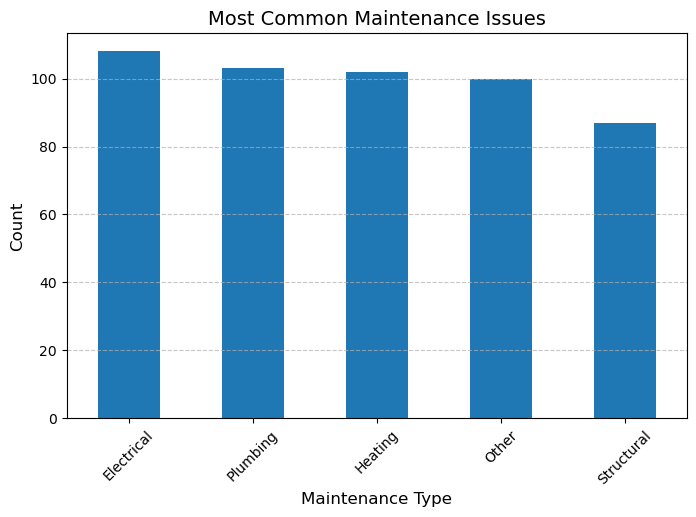

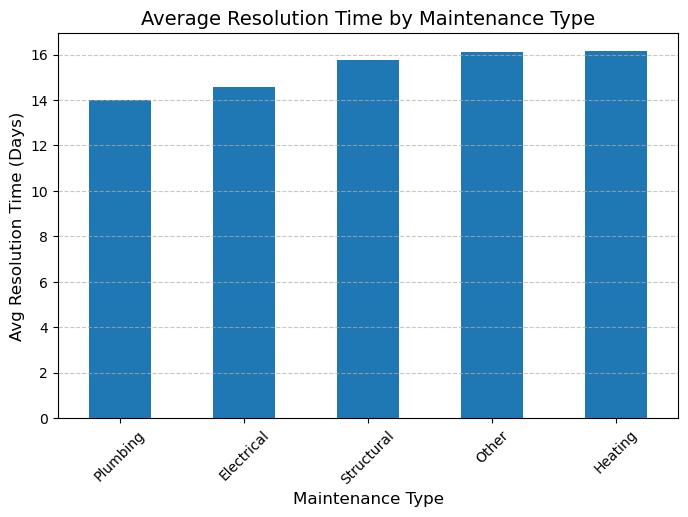

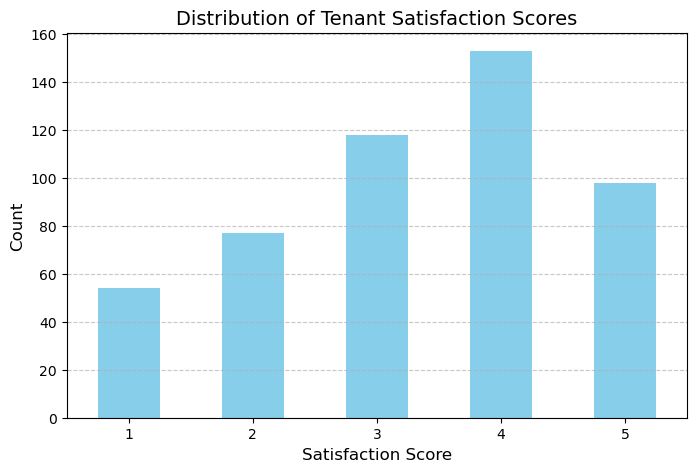

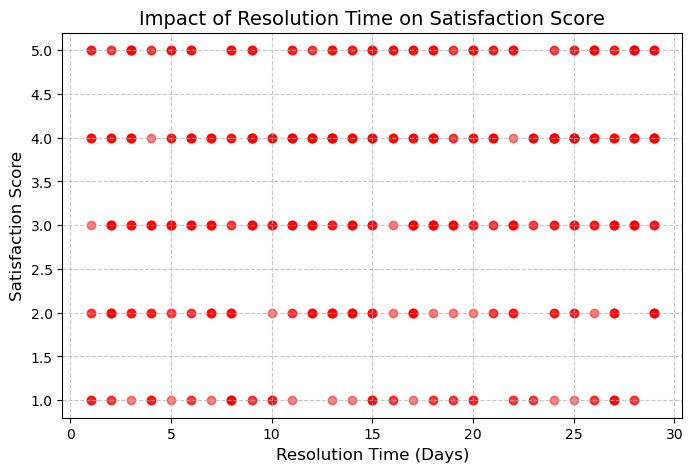

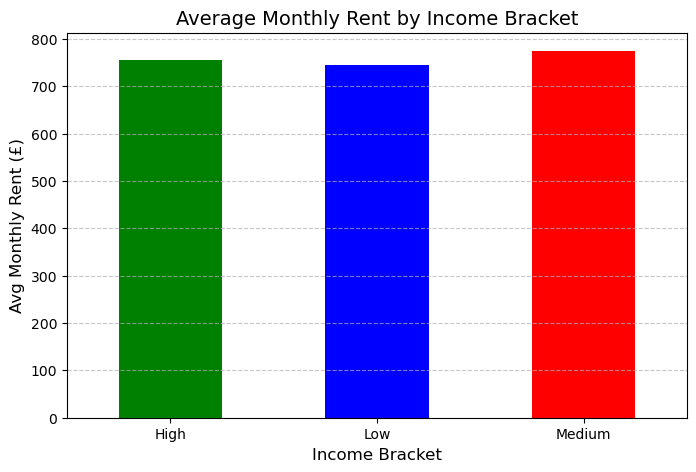

In [8]:
# Generate visualizations based on the cleaned data

import matplotlib.pyplot as plt

# Plot 1: Most Common Maintenance Issues
plt.figure(figsize=(8, 5))
df["Maintenance_Type"].value_counts().plot(kind="bar")
plt.title("Most Common Maintenance Issues", fontsize=14)
plt.xlabel("Maintenance Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Average Resolution Time by Maintenance Type
plt.figure(figsize=(8, 5))
df.groupby("Maintenance_Type")["Resolution_Time_Days"].mean().sort_values().plot(kind="bar")
plt.title("Average Resolution Time by Maintenance Type", fontsize=14)
plt.xlabel("Maintenance Type", fontsize=12)
plt.ylabel("Avg Resolution Time (Days)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 3: Satisfaction Score Distribution
plt.figure(figsize=(8, 5))
df["Satisfaction_Score"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribution of Tenant Satisfaction Scores", fontsize=14)
plt.xlabel("Satisfaction Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 4: Correlation between Resolution Time and Satisfaction Score
plt.figure(figsize=(8, 5))
plt.scatter(df["Resolution_Time_Days"], df["Satisfaction_Score"], alpha=0.5, color="red")
plt.title("Impact of Resolution Time on Satisfaction Score", fontsize=14)
plt.xlabel("Resolution Time (Days)", fontsize=12)
plt.ylabel("Satisfaction Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot 5: Average Rent by Income Bracket
plt.figure(figsize=(8, 5))
df.groupby("Income_Bracket")["Monthly_Rent (£)"].mean().plot(kind="bar", color=["green", "blue", "red"])
plt.title("Average Monthly Rent by Income Bracket", fontsize=14)
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Avg Monthly Rent (£)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
